In [1]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data sets
df_compressed = pd.read_csv("data/compressed_liquid.csv")
df_saturated = pd.read_csv("data/saturated_by_pressure_V1.4.csv")
df_superheated = pd.read_csv("data/saturated_by_temperature_V1.5.csv")

In [3]:
df_compressed.head()

,P (MPa),T (°C),Specific Volume (m^3/kg),Density (kg/m^3),Specific Internal Energy (kJ/kg),Specific Enthalpy (kJ/kg),Specific Entropy [kJ/(kg K)],Phase
0,0.01,0.0,0.001000,999.8,-0.040002,-0.03,-0.00015,"""liquid"""
1,0.01,5.0,0.001000,999.92,21.019999,21.03,0.07625,"""liquid"""
2,0.01,10.0,0.001000,999.66,42.019997,42.03,0.15109,"""liquid"""
3,0.01,15.0,0.001001,999.06,62.979991,62.99,0.22446,"""liquid"""
4,0.01,20.0,0.001002,998.17,83.909982,83.92,0.29648,"""liquid"""


In [4]:
df_compressed[' Phase']

0                     "liquid"
1                     "liquid"
2                     "liquid"
3                     "liquid"
4                     "liquid"
                 ...          
9522     "supercritical fluid"
9523     "supercritical fluid"
9524     "supercritical fluid"
9525     "supercritical fluid"
9526     "supercritical fluid"
Name:  Phase, Length: 9527, dtype: object

In [5]:
df_compressed.shape

(9527, 8)

In [6]:
df_superheated.head()

,T (°C),P (MPa),Specific Volume Liquid (m^3/kg),Specific Volume Vapor (m^3/kg),Internal Energy Liquid (kJ/kg),Internal Energy Vapor (kJ/kg),Internal Energy of Vaporization (kJ/kg),Enthalpy Liquid (kJ/kg),Enthalpy Vapor (kJ/kg),Enthalpy of Vaporization,Entropy Liquid [kJ/(kg K)],Entropy Vapor [kJ/(kg K)],Entropy of Vaporization [kJ/(kg K)]
0,0.01,0.000612,0.001,205.991,0.00,2374.9,2374.90,0.00,2500.9,2500.9,0.00000,9.1555,9.1555
1,1.00,0.000657,0.001,192.439,4.18,2376.2,2372.02,4.18,2502.7,2498.6,0.01526,9.1291,9.1138
2,2.00,0.000706,0.001,179.758,8.39,2377.7,2369.31,8.39,2504.6,2496.2,0.03061,9.1027,9.0720
3,3.00,0.000758,0.001,168.008,12.60,2379.0,2366.40,12.60,2506.4,2493.8,0.04589,9.0765,9.0306
4,4.00,0.000813,0.001,157.116,16.81,2380.4,2363.59,16.81,2508.2,2491.4,0.06110,9.0505,8.9894


In [7]:
df_compressed.describe()

,P (MPa),T (°C),Specific Volume (m^3/kg),Specific Internal Energy (kJ/kg)
count,9527.000000,9527.000000,9527.000000,9527.000000
mean,53.094546,433.978547,1.327281,2173.730441
std,149.901789,414.746833,4.810758,1567.546064
min,0.010000,0.000000,0.000000,-18000.000000
25%,0.300000,125.000000,0.001049,561.769880
50%,2.500000,300.000000,0.014265,2621.077000
75%,20.000000,640.000000,0.594560,3264.806000
max,1000.000000,2000.000000,104.910000,6327.900000


In [8]:
df_saturated.describe()

,P (MPa),T (°C),Specific Volume Liquid (m^3/kg),Specific Volume Vapor (m^3/kg),Internal Energy Liquid (kJ/kg),Internal Energy Vapor (kJ/kg),Internal Energy of Vaporization (kJ/kg),Enthalpy Liquid (kJ/kg),Enthalpy Vapor (kJ/kg),Enthalpy of Vaporization (kJ/kg),Entropy Liquid [kJ/(kg K)],Entropy Vapor [kJ/(kg K)],Entropy of Vaporization [kJ/(kg K)]
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,5.630733,213.596534,0.001308,6.819441,954.090217,2509.454152,1555.363935,963.524946,2681.338628,1717.817329,2.419466,6.425267,4.005802
std,6.521301,108.082854,0.000331,25.474014,519.518400,99.323856,546.593065,530.583818,126.063888,567.141745,1.114604,1.056318,2.167921
min,0.000612,0.010000,0.001000,0.003106,0.000000,2015.800000,0.000000,0.000000,2084.300000,0.000000,0.000000,4.407000,0.000000
25%,0.280000,131.185000,0.001071,0.019700,551.140000,2453.000000,1190.600000,551.440000,2605.000000,1360.500000,1.647100,5.659900,2.350400
50%,2.500000,223.950000,0.001197,0.079949,958.920000,2546.600000,1643.080000,961.910000,2729.100000,1840.000000,2.554300,6.255800,3.701500
75%,9.300000,305.707000,0.001428,0.646240,1364.100000,2582.700000,1989.660000,1377.400000,2776.300000,2170.300000,3.309600,7.014600,5.367500
max,22.064000,373.946000,0.003106,205.991000,2015.800000,2603.200000,2374.900000,2084.300000,2803.200000,2500.900000,4.407000,9.155500,9.155500


In [9]:
df_superheated.describe()

,T (°C),P (MPa),Specific Volume Liquid (m^3/kg),Specific Volume Vapor (m^3/kg),Internal Energy Liquid (kJ/kg),Internal Energy Vapor (kJ/kg),Internal Energy of Vaporization (kJ/kg),Enthalpy Liquid (kJ/kg),Enthalpy Vapor (kJ/kg),Enthalpy of Vaporization,Entropy Liquid [kJ/(kg K)],Entropy Vapor [kJ/(kg K)],Entropy of Vaporization [kJ/(kg K)]
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0000,375.000000,375.000000,375.000000
mean,186.999883,4.208082,0.001238,9.484523,826.200480,2512.708000,1686.507520,833.005067,2684.919467,1851.9152,2.144645,6.683549,4.538909
std,108.397122,5.796550,0.000285,29.101652,509.780109,88.476201,512.038493,518.986639,113.638862,523.6235,1.124712,1.082472,2.203818
min,0.010000,0.000612,0.001000,0.003106,0.000000,2015.800000,0.000000,0.000000,2084.300000,0.0000,0.000000,4.407000,0.000000
25%,93.500000,0.080055,0.001039,0.029905,391.695000,2456.750000,1355.100000,391.775000,2611.050000,1539.8000,1.233200,5.854250,2.781150
50%,187.000000,1.174800,0.001137,0.166620,792.730000,2537.200000,1794.570000,794.070000,2715.900000,1988.9000,2.206700,6.529100,4.322300
75%,280.500000,6.465250,0.001334,2.086450,1230.850000,2586.500000,2106.505000,1239.500000,2781.200000,2273.4000,3.073100,7.433750,6.200600
max,373.946000,22.064000,0.003106,205.991000,2015.800000,2603.200000,2374.900000,2084.300000,2803.200000,2500.9000,4.407000,9.155500,9.155500


In [10]:
df_compressed.isnull().sum()

P (MPa)                              0
T (°C)                               0
 Specific Volume (m^3/kg)            0
 Density (kg/m^3)                    0
 Specific Internal Energy (kJ/kg)    0
 Specific Enthalpy (kJ/kg)           0
 Specific Entropy [kJ/(kg K)]        0
 Phase                               0
dtype: int64

In [11]:
df_saturated.isnull().sum()

P (MPa)                                    0
T (°C)                                     0
Specific Volume Liquid (m^3/kg)            0
Specific Volume Vapor (m^3/kg)             0
Internal Energy Liquid (kJ/kg)             0
Internal Energy Vapor (kJ/kg)              0
Internal Energy of Vaporization (kJ/kg)    0
Enthalpy Liquid (kJ/kg)                    0
Enthalpy Vapor (kJ/kg)                     0
Enthalpy of Vaporization (kJ/kg)           0
Entropy Liquid [kJ/(kg K)]                 0
Entropy Vapor [kJ/(kg K)]                  0
Entropy of Vaporization [kJ/(kg K)]        0
dtype: int64

In [12]:
df_superheated.isnull().sum()

T (°C)                                     0
P (MPa)                                    0
Specific Volume Liquid (m^3/kg)            0
Specific Volume Vapor (m^3/kg)             0
Internal Energy Liquid (kJ/kg)             0
Internal Energy Vapor (kJ/kg)              0
Internal Energy of Vaporization (kJ/kg)    0
Enthalpy Liquid (kJ/kg)                    0
Enthalpy Vapor (kJ/kg)                     0
Enthalpy of Vaporization                   0
Entropy Liquid [kJ/(kg K)]                 0
Entropy Vapor [kJ/(kg K)]                  0
Entropy of Vaporization [kJ/(kg K)]        0
dtype: int64

In [13]:
df_compressed.columns

Index(['P (MPa)', 'T (°C)', ' Specific Volume (m^3/kg)', ' Density (kg/m^3)',
       ' Specific Internal Energy (kJ/kg)', ' Specific Enthalpy (kJ/kg)',
       ' Specific Entropy [kJ/(kg K)]', ' Phase'],
      dtype='object')

In [14]:
df_saturated.columns

Index(['P (MPa)', 'T (°C)', 'Specific Volume Liquid (m^3/kg)',
       'Specific Volume Vapor (m^3/kg)', 'Internal Energy Liquid (kJ/kg)',
       'Internal Energy Vapor (kJ/kg)',
       'Internal Energy of Vaporization (kJ/kg)', 'Enthalpy Liquid (kJ/kg)',
       'Enthalpy Vapor (kJ/kg)', 'Enthalpy of Vaporization (kJ/kg)',
       'Entropy Liquid [kJ/(kg K)]', 'Entropy Vapor [kJ/(kg K)]',
       'Entropy of Vaporization [kJ/(kg K)]'],
      dtype='object')

In [15]:
df_superheated.columns

Index(['T (°C)', 'P (MPa)', 'Specific Volume Liquid (m^3/kg)',
       'Specific Volume Vapor (m^3/kg)', 'Internal Energy Liquid (kJ/kg)',
       'Internal Energy Vapor (kJ/kg)',
       'Internal Energy of Vaporization (kJ/kg)', 'Enthalpy Liquid (kJ/kg)',
       'Enthalpy Vapor (kJ/kg)', 'Enthalpy of Vaporization',
       'Entropy Liquid [kJ/(kg K)]', 'Entropy Vapor [kJ/(kg K)]',
       'Entropy of Vaporization [kJ/(kg K)]'],
      dtype='object')

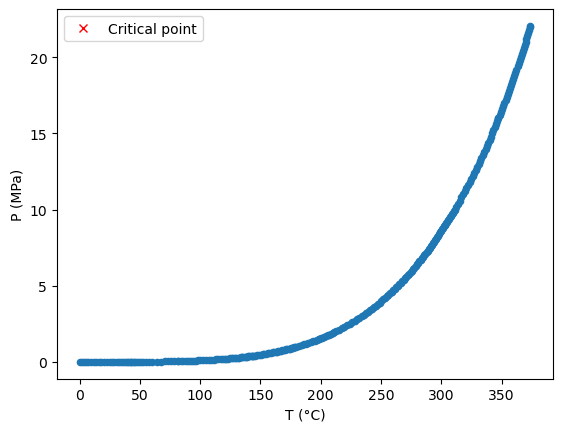

In [16]:
df_saturated.plot.scatter(x='T (°C)', y='P (MPa)')

T_critical = df_saturated[df_saturated['Enthalpy Vapor (kJ/kg)'] == 0]['T (°C)'].values
P_critical = df_saturated[df_saturated['Enthalpy Vapor (kJ/kg)'] == 0]['P (MPa)'].values

plt.plot(T_critical, P_critical, 'rx', label='Critical point')
plt.legend()

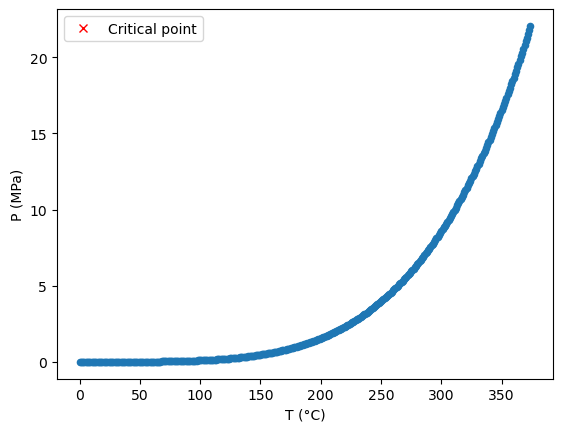

In [17]:
df_superheated.plot.scatter(x='T (°C)', y='P (MPa)')

T_critical = df_superheated[df_superheated['Enthalpy Vapor (kJ/kg)'] == 0]['T (°C)'].values
P_critical = df_superheated[df_superheated['Enthalpy Vapor (kJ/kg)'] == 0]['P (MPa)'].values

plt.plot(T_critical, P_critical, 'rx', label='Critical point')
plt.legend()

In [18]:
categories = df_compressed[' Phase'].unique()
categories


array([' "liquid"', ' "saturated liquid"', ' "saturated vapor"',
       ' "vapor"', ' "supercritical fluid"'], dtype=object)

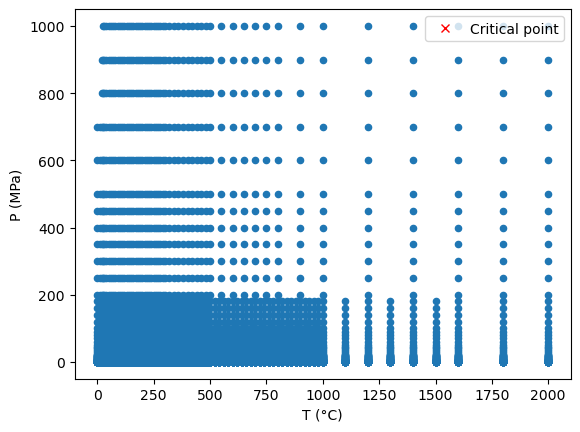

In [19]:
df_compressed.plot.scatter(x='T (°C)', y='P (MPa)')

T_critical = df_compressed[df_compressed[' Specific Enthalpy (kJ/kg)'] == 0]['T (°C)'].values
P_critical = df_compressed[df_compressed[' Specific Enthalpy (kJ/kg)'] == 0]['P (MPa)'].values

plt.plot(T_critical, P_critical, 'rx', label='Critical point')
plt.legend()

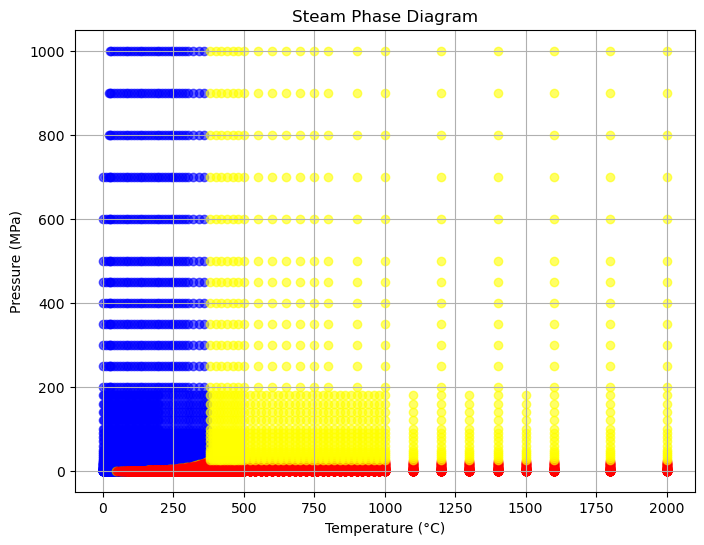

In [20]:
import matplotlib.pyplot as plt

# Define colors for each phase
colors = {' "liquid"': 'blue', ' "saturated liquid"': 'green',
          ' "saturated vapor"': 'orange', ' "vapor"': 'red', ' "supercritical fluid"': 'yellow'}

# Plot each phase separately
plt.figure(figsize=(8, 6))

for phase in categories:
    df_phase = df_compressed[df_compressed[' Phase'] == phase]
    plt.scatter(df_phase['T (°C)'], df_phase['P (MPa)'],
                color=colors.get(phase, 'black'), label=phase, alpha=0.6)

# Plot critical point
T_critical = df_compressed[df_compressed[' Specific Enthalpy (kJ/kg)'] == 0]['T (°C)'].values
P_critical = df_compressed[df_compressed[' Specific Enthalpy (kJ/kg)'] == 0]['P (MPa)'].values

plt.plot(T_critical, P_critical, 'rx', markersize=10, label='Critical Point')

# Labels and legend
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (MPa)')
plt.title('Steam Phase Diagram')
#plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Check unique phase categories
print("Unique Phases:", df_compressed[' Phase'].unique())


Unique Phases: [' "liquid"' ' "saturated liquid"' ' "saturated vapor"' ' "vapor"'
 ' "supercritical fluid"']


In [22]:
# Strip spaces and remove double quotes
df_compressed[' Phase'] = df_compressed[' Phase'].str.strip().str.replace('"', '')

# Check cleaned unique values
print("Cleaned Phases:", df_compressed[' Phase'].unique())


Cleaned Phases: ['liquid' 'saturated liquid' 'saturated vapor' 'vapor'
 'supercritical fluid']


In [23]:
# Manually create a mapping for the phases
phase_mapping = {
    'liquid': 0,
    'saturated liquid': 1,
    'saturated vapor': 2,
    'vapor': 3,
    'supercritical fluid': 4
}

# Apply the mapping to the Phase column
df_compressed['Phase_encoded'] = df_compressed[' Phase'].map(phase_mapping)

# Check the result
print(df_compressed[[' Phase', 'Phase_encoded']].head())


    Phase  Phase_encoded
0  liquid              0
1  liquid              0
2  liquid              0
3  liquid              0
4  liquid              0


In [24]:
# Check the column names and first few rows of the dataframe
print(df_compressed.columns)
print(df_compressed.head())


Index(['P (MPa)', 'T (°C)', ' Specific Volume (m^3/kg)', ' Density (kg/m^3)',
       ' Specific Internal Energy (kJ/kg)', ' Specific Enthalpy (kJ/kg)',
       ' Specific Entropy [kJ/(kg K)]', ' Phase', 'Phase_encoded'],
      dtype='object')
   P (MPa)  T (°C)   Specific Volume (m^3/kg)  Density (kg/m^3)  \
0     0.01     0.0                   0.001000             999.8   
1     0.01     5.0                   0.001000            999.92   
2     0.01    10.0                   0.001000            999.66   
3     0.01    15.0                   0.001001            999.06   
4     0.01    20.0                   0.001002            998.17   

    Specific Internal Energy (kJ/kg)  Specific Enthalpy (kJ/kg)  \
0                          -0.040002                      -0.03   
1                          21.019999                      21.03   
2                          42.019997                      42.03   
3                          62.979991                      62.99   
4                   

In [25]:
# Check for missing values in the relevant columns
print(df_compressed[['T (°C)', 'P (MPa)', 'Phase_encoded']].isnull().sum())


T (°C)           0
P (MPa)          0
Phase_encoded    0
dtype: int64


In [26]:
# Drop rows with missing values
df_compressed = df_compressed.dropna(subset=['T (°C)', 'P (MPa)', 'Phase_encoded'])


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_compressed[['T (°C)', 'P (MPa)']]  # Independent variables
y = df_compressed['Phase_encoded']         # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
import xgboost as xgb

# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective="multi:softmax",   # Multi-class classification
    num_class=len(df_compressed['Phase_encoded'].unique()),  # Number of phase categories
    eval_metric="mlogloss",       # Multi-class log loss
    use_label_encoder=False      # Avoid deprecation warnings
)

# Train the model
model.fit(X_train, y_train)


C:\Users\kadde\anaconda3\envs\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:25:42] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred))


Model Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       757
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        14
           3       1.00      0.99      1.00       935
           4       1.00      1.00      1.00       186

    accuracy                           0.98      1906
   macro avg       0.60      0.60      0.60      1906
weighted avg       0.98      0.98      0.98      1906



In [30]:
df_compressed

,P (MPa),T (°C),Specific Volume (m^3/kg),Density (kg/m^3),Specific Internal Energy (kJ/kg),Specific Enthalpy (kJ/kg),Specific Entropy [kJ/(kg K)],Phase,Phase_encoded
0,0.01,0.0,0.001000,999.8,-0.040002,-0.03,-0.00015,liquid,0
1,0.01,5.0,0.001000,999.92,21.019999,21.03,0.07625,liquid,0
2,0.01,10.0,0.001000,999.66,42.019997,42.03,0.15109,liquid,0
3,0.01,15.0,0.001001,999.06,62.979991,62.99,0.22446,liquid,0
4,0.01,20.0,0.001002,998.17,83.909982,83.92,0.29648,liquid,0
...,...,...,...,...,...,...,...,...,...
9522,1000.00,1200.0,0.001343,744.75,3674.000000,5016.7,5.7036,supercritical fluid,4
9523,1000.00,1400.0,0.001452,688.5,4244.800000,5697.2,6.1368,supercritical fluid,4
9524,1000.00,1600.0,0.001563,639.92,4812.000000,6374.7,6.5193,supercritical fluid,4
9525,1000.00,1800.0,0.001672,598.26,5376.700000,7048.2,6.8609,supercritical fluid,4


In [33]:
# Reverse the phase_mapping for decoding
inverse_phase_mapping = {v: k for k, v in phase_mapping.items()}

# Decode the predictions
decoded_predictions = [inverse_phase_mapping[pred] for pred in y_pred]

# Display the decoded predictions
print("Decoded Predictions:", decoded_predictions[:10])

Decoded Predictions: ['supercritical fluid', 'liquid', 'vapor', 'liquid', 'liquid', 'liquid', 'vapor', 'liquid', 'liquid', 'vapor']


In [43]:
# Example of new data (e.g., Temperature: 350°C, Pressure: 8 MPa)
new_data = [[350, 8]]  # Ensure the new data is in the correct format (list of lists)

# Get the prediction for the new data
new_prediction = model.predict(new_data)

# Decode the predicted phase (optional)
predicted_phase = inverse_phase_mapping[new_prediction[0]]
print(f"Predicted Phase for new data: {predicted_phase}")


Predicted Phase for new data: vapor


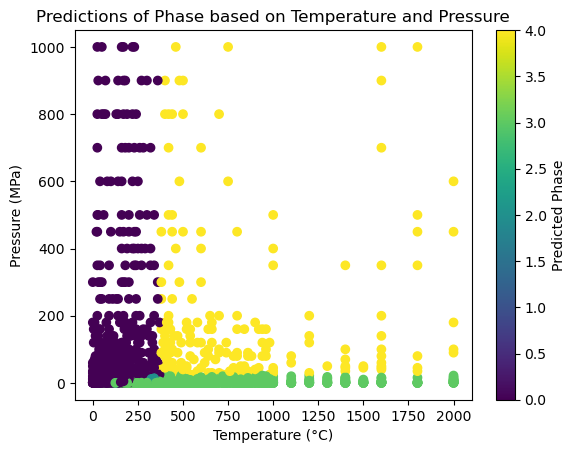

In [44]:
import matplotlib.pyplot as plt

# Plot the scatter plot with predictions
plt.scatter(X_test['T (°C)'], X_test['P (MPa)'], c=y_pred, cmap='viridis', label='Predicted Phase')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (MPa)')
plt.title('Predictions of Phase based on Temperature and Pressure')
plt.colorbar(label='Predicted Phase')
plt.show()


In [45]:
# Save the model to a file
model.save_model('category_model.json')

In [49]:
import xgboost as xgb

# Load the model using Booster
loaded_model = xgb.Booster()  # Initialize Booster object
loaded_model.load_model('category_model.json')  # Load the saved model


In [62]:
# Example of new data (e.g., Temperature: 350°C, Pressure: 8 MPa)
new_data = [[49, 0.01]]  # Ensure the new data is in the correct format (list of lists)

# Get the prediction for the new data
new_prediction = model.predict(new_data)

# Decode the predicted phase (optional)
predicted_phase = inverse_phase_mapping[new_prediction[0]]
print(f"Predicted Phase for new data: {predicted_phase}")


Predicted Phase for new data: saturated vapor
